In [1]:
## Update sklearn to prevent version mismatches
# !pip install sklearn --upgrade

In [2]:
## install joblib. This will be used to save your model. 
## Restart your kernel after installing 
#!pip install joblib

In [3]:
# Basic dependiecies
import pandas as pd

import matplotlib.pyplot as plt

# To save model
import joblib

In [4]:
# sklearn imports
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler, LabelEncoder
#from sklearn.preprocessing import MinMaxScaler, LabelEncoder

from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report

# Read the CSV and Perform Basic Data Cleaning

In [5]:
stars_df = pd.read_csv("../ETL/Resources/cleaned_data/stars_classification.csv")
print(f'Count of pre-dropped data: {len(stars_df)}')

# Drop the null columns where all values are null
stars_df = stars_df.dropna(axis='columns', how='all')
# Drop the null rows
stars_df = stars_df.dropna()
stars_df = stars_df.drop(['Unnamed: 0'], axis=1)

print(f'The final count of data is: {len(stars_df)}')
stars_df.head()

Count of pre-dropped data: 240
The final count of data is: 240


,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.002400,0.1700,16.12,Red,M,0
1,3042,0.000500,0.1542,16.60,Red,M,0
2,2600,0.000300,0.1020,18.70,Red,M,0
3,2800,0.000200,0.1600,16.65,Red,M,0
4,1939,0.000138,0.1030,20.06,Red,M,0


In [6]:
stars_df['Color'].unique()

array(['Red', 'Blue White', 'White', 'Yellowish White', 'Blue white',
       'Pale yellow orange', 'Blue', 'Blue-white', 'Whitish',
       'yellow-white', 'Orange', 'White-Yellow', 'white', 'yellowish',
       'Yellowish', 'Orange-Red', 'Blue-White'], dtype=object)

In [7]:
# Need to turn color into number (convert categorial data)
label_encoder = LabelEncoder()
label_encoder.fit(stars_df['Color'])

stars_df['Color'] = label_encoder.transform(stars_df['Color'])

In [8]:
stars_df['Color'].unique()

array([ 8,  1,  9, 13,  2,  7,  0,  4, 11, 15,  5, 10, 14, 16, 12,  6,  3])

In [9]:
colors = ['Red', 'Blue White', 'White', 'Yellowish White', 'Blue white',
       'Pale yellow orange', 'Blue', 'Blue-white', 'Whitish',
       'yellow-white', 'Orange', 'White-Yellow', 'white', 'yellowish',
       'Yellowish', 'Orange-Red', 'Blue-White']
color_number = [ 8,  1,  9, 13,  2,  7,  0,  4, 11, 15,  5, 10, 14, 16, 12,  6,  3]

color_type_dict = {'color': colors, 'color_number': color_number}
color_type_df = pd.DataFrame(color_type_dict)
color_type_df

,color,color_number
0,Red,8
1,Blue White,1
2,White,9
3,Yellowish White,13
4,Blue white,2
5,Pale yellow orange,7
6,Blue,0
7,Blue-white,4
8,Whitish,11
9,yellow-white,15


In [10]:
## Need to scale due to number of color ranging from 0-16..?


# stars_df['Color'] = StandardScaler(stars_df['Color']).fit()
# stars_df['Color'] = X_scaler.transform(stars_df['Color'])
# stars_df['Color'].unique()

In [11]:
stars_df['Spectral_Class'].unique()

array(['M', 'B', 'A', 'F', 'O', 'K', 'G'], dtype=object)

In [12]:
# Need to turn spectrial class into number (convert categorial data)
label_encoder = LabelEncoder()
label_encoder.fit(stars_df['Spectral_Class'])

stars_df['Spectral_Class'] = label_encoder.transform(stars_df['Spectral_Class'])

In [13]:
stars_df['Spectral_Class'].unique()

array([5, 1, 0, 2, 6, 4, 3])

In [14]:
spec_class = ['M', 'B', 'A', 'F', 'O', 'K', 'G']
spec_number = [5, 1, 0, 2, 6, 4, 3]

spectral_class_dict = {'spectral_class': spec_class, 'spec_number': spec_number}
spectral_class_df = pd.DataFrame(spectral_class_dict)
spectral_class_df

,spectral_class,spec_number
0,M,5
1,B,1
2,A,0
3,F,2
4,O,6
5,K,4
6,G,3


In [15]:
# Check for direct correlations within columns to see if they need be dropped.
stars_df.corr()

,Temperature,L,R,A_M,Color,Spectral_Class,Type
Temperature,1.000000,0.393404,0.064216,-0.420261,-0.680107,-0.207852,0.411129
L,0.393404,1.000000,0.526516,-0.692619,-0.379181,0.275280,0.676845
R,0.064216,0.526516,1.000000,-0.608728,-0.011242,0.097124,0.660975
A_M,-0.420261,-0.692619,-0.608728,1.000000,0.328318,-0.085840,-0.955276
Color,-0.680107,-0.379181,-0.011242,0.328318,1.000000,0.018774,-0.304993
Spectral_Class,-0.207852,0.275280,0.097124,-0.085840,0.018774,1.000000,-0.049131
Type,0.411129,0.676845,0.660975,-0.955276,-0.304993,-0.049131,1.000000


In [16]:
stars_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Temperature     240 non-null    int64  
 1   L               240 non-null    float64
 2   R               240 non-null    float64
 3   A_M             240 non-null    float64
 4   Color           240 non-null    int32  
 5   Spectral_Class  240 non-null    int32  
 6   Type            240 non-null    int64  
dtypes: float64(3), int32(2), int64(2)
memory usage: 13.1 KB


# Select your features (columns)

In [17]:
# Set features. This will also be used as your x values.
selected_features_df = stars_df.drop(['Type'], axis=1)
selected_features_df.head()

,Temperature,L,R,A_M,Color,Spectral_Class
0,3068,0.002400,0.1700,16.12,8,5
1,3042,0.000500,0.1542,16.60,8,5
2,2600,0.000300,0.1020,18.70,8,5
3,2800,0.000200,0.1600,16.65,8,5
4,1939,0.000138,0.1030,20.06,8,5


# Create a Train Test Split

Use `koi_disposition` for the y values

In [18]:
X = selected_features_df
y = stars_df['Type']
#.values.reshape(-1, 1)
print(X.shape, y.shape)

(240, 6) (240,)


In [19]:
# Create train and test values from our data set 
#from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [20]:
print(f'The length of the X train data is: {len(X_train)}')
X_train.head()

The length of the X train data is: 180


,Temperature,L,R,A_M,Color,Spectral_Class
71,3607,0.02200,0.380,10.12,8,5
221,12749,332520.00000,76.000,-7.02,0,6
170,3570,320000.00000,1480.000,-7.58,8,5
16,2799,0.00180,0.160,14.79,8,5
65,3295,0.00098,0.132,17.13,8,5


In [21]:
y_train

71     1
221    4
170    5
16     1
65     0
      ..
114    5
194    1
31     3
222    4
166    4
Name: Type, Length: 180, dtype: int64

# Pre-processing

Scale the data using the MinMaxScaler and perform some feature selection

In [22]:
# Create a Scaler model and fit it to the training data

X_scaler = StandardScaler().fit(X_train)

#X_scaler = MinMaxScaler().fit(X_train)

In [23]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Y is categorical do not scale

In [24]:
X_train_scaled

array([[-0.71997007, -0.58815959, -0.45925746,  0.54855423,  0.44320609,
         0.60945143],
       [ 0.28696345,  1.33297227, -0.31089374, -1.09103733, -1.41748422,
         1.09271688],
       [-0.72404539,  1.26063806,  2.44370379, -1.14460624,  0.44320609,
         0.60945143],
       ...,
       [ 2.18705207, -0.42153682, -0.44764264, -0.82127955, -0.48713906,
        -1.32361037],
       [-0.08378018,  1.39317375, -0.26773053, -1.08721097, -1.41748422,
         1.09271688],
       [ 1.07713421,  0.29001923, -0.31677963, -0.96381114, -1.41748422,
         1.09271688]])

# Train the Model



In [25]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 50, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")

k: 1, Train/Test Score: 1.000/0.983
k: 3, Train/Test Score: 0.978/0.950
k: 5, Train/Test Score: 0.972/0.967
k: 7, Train/Test Score: 0.956/0.950
k: 9, Train/Test Score: 0.961/0.933
k: 11, Train/Test Score: 0.961/0.933
k: 13, Train/Test Score: 0.961/0.950
k: 15, Train/Test Score: 0.950/0.917
k: 17, Train/Test Score: 0.922/0.867
k: 19, Train/Test Score: 0.928/0.867
k: 21, Train/Test Score: 0.906/0.850
k: 23, Train/Test Score: 0.900/0.850
k: 25, Train/Test Score: 0.861/0.817
k: 27, Train/Test Score: 0.839/0.783
k: 29, Train/Test Score: 0.811/0.767
k: 31, Train/Test Score: 0.783/0.750
k: 33, Train/Test Score: 0.783/0.733
k: 35, Train/Test Score: 0.783/0.733
k: 37, Train/Test Score: 0.761/0.733
k: 39, Train/Test Score: 0.744/0.717
k: 41, Train/Test Score: 0.739/0.717
k: 43, Train/Test Score: 0.733/0.717
k: 45, Train/Test Score: 0.739/0.717
k: 47, Train/Test Score: 0.733/0.717
k: 49, Train/Test Score: 0.733/0.700


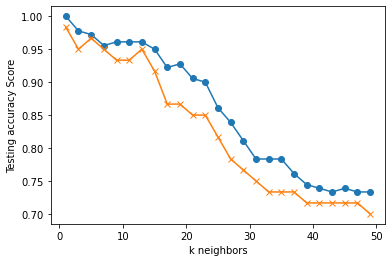

In [26]:
# Plot scores to give visual representation
plt.plot(range(1, 50, 2), train_scores, marker='o')
plt.plot(range(1, 50, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [27]:
knn_model = KNeighborsClassifier(n_neighbors=7)
knn_model.fit(X_train_scaled, y_train)

print('k=7 Test Acc: %.3f' % knn_model.score(X_train_scaled, y_train))
print('k=7 Test Acc: %.3f' % knn_model.score(X_test_scaled, y_test))


k=7 Test Acc: 0.956
k=7 Test Acc: 0.950


In [28]:
# Get prediction value to test against classification report
predictions = knn_model.predict(X_test_scaled)

In [29]:
print(classification_report(y_test, predictions, 
                            target_names = ["0", "1", "2", "3", "4", "5"]))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10
           3       0.89      0.80      0.84        10
           4       0.82      0.90      0.86        10
           5       1.00      1.00      1.00        10

    accuracy                           0.95        60
   macro avg       0.95      0.95      0.95        60
weighted avg       0.95      0.95      0.95        60



# Save the Model

In [30]:
# filename = '../Saved_Models/standard_scalar_SCV_gridSearch.sav'
# joblib.dump(model, filename)